In [9]:
import pandas as pd 
import numpy as np 

In [10]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# Basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

Dataset Shape: (6362620, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [12]:
# Basic statistics
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
# Print column names
print("Columns in the dataset:")
print(df.columns.tolist())

# Print data types of each column
print("\nData types of columns:")
print(df.dtypes)

# Print number of rows and columns
print("\nShape of dataset:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Columns in the dataset:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Data types of columns:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Shape of dataset:
Number of rows: 6362620
Number of columns: 11


In [15]:
# Check class distribution
print("\nTarget variable distribution:")
print(df['isFraud'].value_counts())         #shows number of fraud vs non-fraud cases
print("\nPercentage distribution:")
print(df['isFraud'].value_counts(normalize=True) * 100)         #shows percentage share


Target variable distribution:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Percentage distribution:
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


### Observation:
- Fraud (1) = 8,213 cases (~0.13%)
- Non-fraud (0) = ~6.35 million cases (~99.87%)
- The dataset is highly imbalanced → fraud is very rare.


In [16]:
# Transaction Type Analysis
print("1. Transaction Type Distribution:")
type_dist = df['type'].value_counts()
type_pct = df['type'].value_counts(normalize=True) * 100
for t_type, count in type_dist.items():
    print(f"{t_type}: {count} transactions ({type_pct[t_type]:.2f}%)")



1. Transaction Type Distribution:
CASH_OUT: 2237500 transactions (35.17%)
PAYMENT: 2151495 transactions (33.81%)
CASH_IN: 1399284 transactions (21.99%)
TRANSFER: 532909 transactions (8.38%)
DEBIT: 41432 transactions (0.65%)
CASH_OUT: 2237500 transactions (35.17%)
PAYMENT: 2151495 transactions (33.81%)
CASH_IN: 1399284 transactions (21.99%)
TRANSFER: 532909 transactions (8.38%)
DEBIT: 41432 transactions (0.65%)


### Observation:
- Most transactions are CASH_OUT (35%) and PAYMENT (34%).
- TRANSFER = 8%, CASH-IN = 22%, DEBIT = <1%.
- PAYMENT and CASH_OUT dominate the dataset.


In [17]:
# Fraud Analysis by Transaction Type
print("\n2. Fraud Distribution by Transaction Type:")
fraud_by_type = pd.crosstab(df['type'], df['isFraud'])
print(fraud_by_type)


2. Fraud Distribution by Transaction Type:
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097
isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


### Observation:
- Fraud only occurs in TRANSFER and CASH_OUT transactions.
- No fraud cases in PAYMENT, CASH-IN, or DEBIT.
- This means fraudsters prefer to use TRANSFER + CASH_OUT to steal money.


In [18]:
# Amount Statistics for Fraudulent vs Non-Fraudulent
print("\n3. Amount Statistics:")
print("\nFraudulent Transactions:")
print(df[df['isFraud']==1]['amount'].describe())
print("\nNon-Fraudulent Transactions:")
print(df[df['isFraud']==0]['amount'].describe())


3. Amount Statistics:

Fraudulent Transactions:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

Non-Fraudulent Transactions:
count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64
count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64


### Observation:
- Fraudulent transactions: median amount ≈ 441,000, mean ≈ 1.47M, max ≈ 92M.
- Non-fraudulent transactions: median amount ≈ 75,000.
- Fraud transactions usually involve much larger amounts than normal ones.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


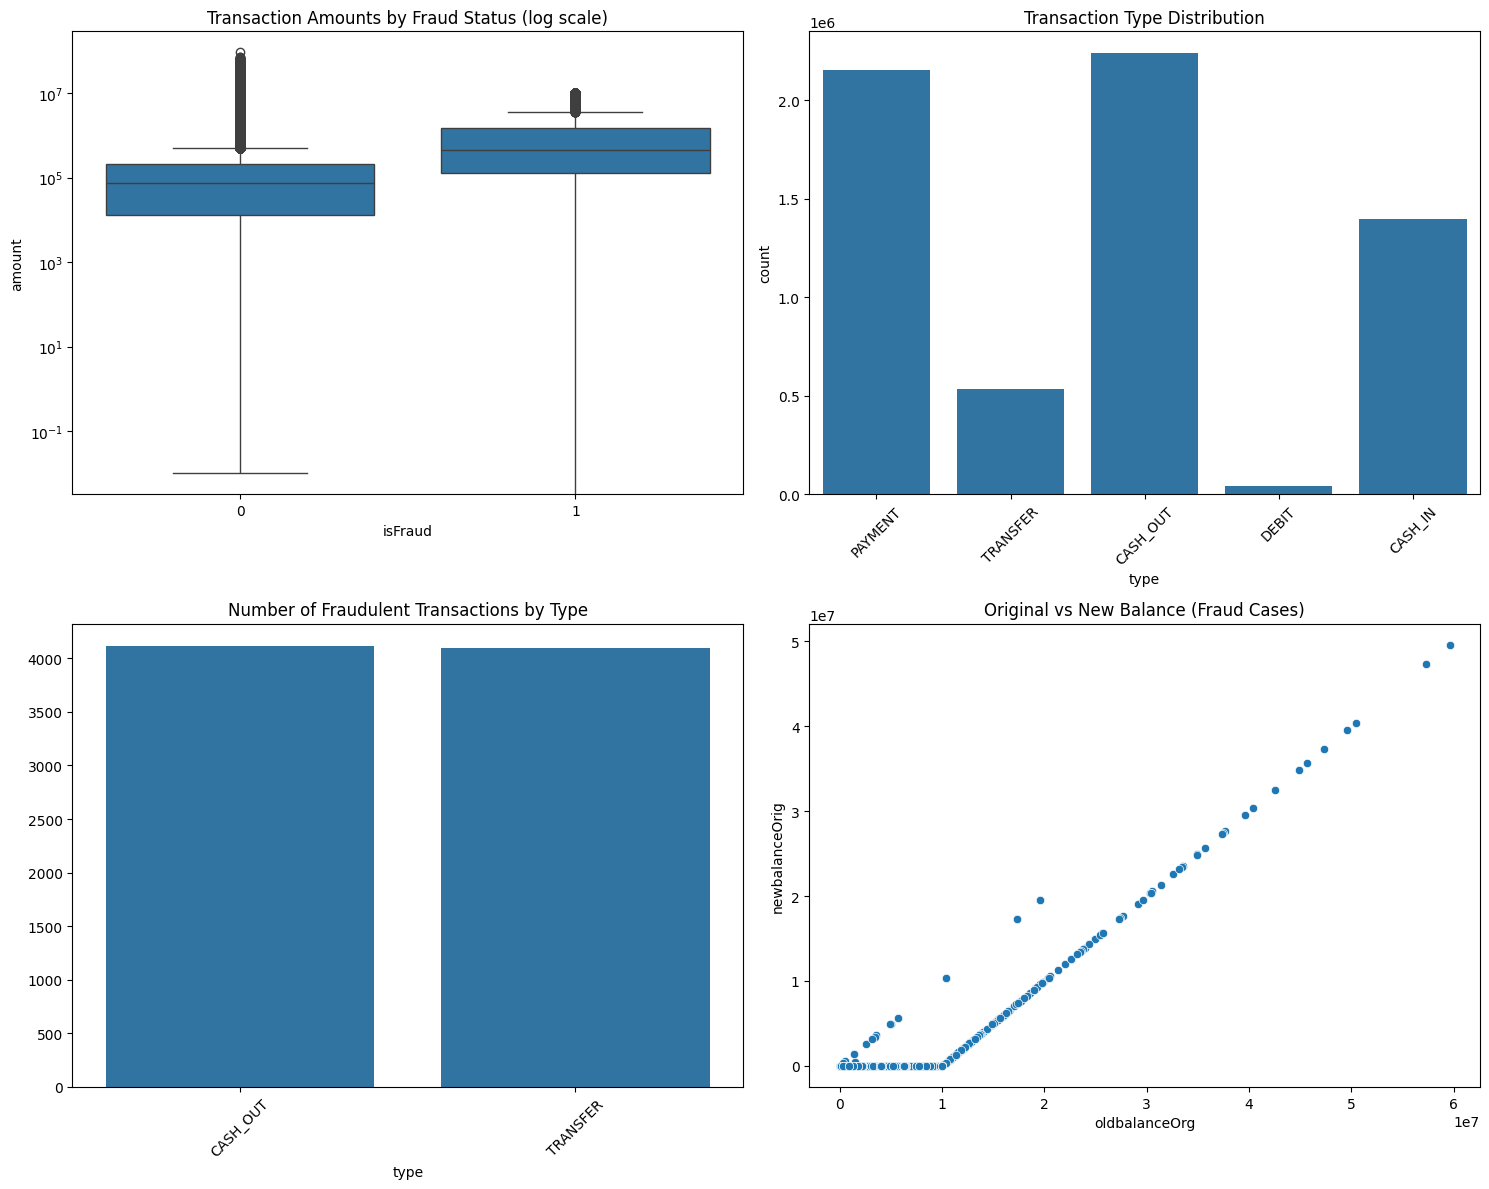

In [20]:
# Create subplots for key visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Transaction Amount Distribution (log scale)
sns.boxplot(x='isFraud', y='amount', data=df, ax=axes[0,0])
axes[0,0].set_yscale('log')
axes[0,0].set_title('Transaction Amounts by Fraud Status (log scale)')

# 2. Transaction Type Distribution
sns.countplot(x='type', data=df, ax=axes[0,1])
axes[0,1].set_title('Transaction Type Distribution')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Fraud by Transaction Type
fraud_by_type = df[df['isFraud']==1]['type'].value_counts()
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, ax=axes[1,0])
axes[1,0].set_title('Number of Fraudulent Transactions by Type')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Original Balance vs New Balance for Fraud Cases
sns.scatterplot(data=df[df['isFraud']==1], 
                x='oldbalanceOrg', y='newbalanceOrig',
                ax=axes[1,1])
axes[1,1].set_title('Original vs New Balance (Fraud Cases)')

plt.tight_layout()
plt.show()

### Visualization Analysis:

1. Transaction Amount Distribution:
- Fraudulent transactions generally involve much larger amounts compared to non-fraud.
- Fraudsters target high-value transfers.

2. Transaction Types:
- Majority of transactions are CASH_OUT and PAYMENT.
- TRANSFER and CASH-IN are less common, while DEBIT is very rare.

3. Fraud Patterns:
- Fraud is concentrated in TRANSFER and CASH_OUT transactions.
- No fraud occurs in PAYMENT, CASH-IN, or DEBIT.

4. Balance Changes:
- Fraudsters often drain the sender's account balance to zero.
- Balance patterns in fraud cases show unusual behavior compared to normal transactions.


## Feature Engineering and Preprocessing

1. Handle Transaction Types
   - Convert categorical 'type' to numeric using encoding
   - Focus on TRANSFER and CASH_OUT transactions

2. Create New Features
   - Transaction amount ratios
   - Balance change indicators
   - Time-based features

3. Scale Numerical Features
   - Handle large amount variations
   - Prepare for model training

In [21]:
def create_features(df):
    # Transaction type encoding
    type_dummies = pd.get_dummies(df['type'], drop_first=True)
    df = pd.concat([df, type_dummies], axis=1)
    
    # Amount-based features
    df['amount_scaled'] = np.log1p(df['amount'])
    df['balance_diff_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
    df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
    
    # Balance indicators
    df['balance_zero_orig'] = (df['newbalanceOrig'] == 0).astype(int)
    df['balance_zero_dest'] = (df['newbalanceDest'] == 0).astype(int)
    
    return df

df_processed = create_features(df.copy())
print("New Features Created:")
print(df_processed.columns.tolist())


New Features Created:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'amount_scaled', 'balance_diff_orig', 'balance_diff_dest', 'balance_zero_orig', 'balance_zero_dest']


In [22]:
# Step 1: Data Quality Checks
print("=== DATA QUALITY ASSESSMENT ===")
print("Missing values per column:")
print(df_processed.isnull().sum())
print(f"\nDataset shape: {df_processed.shape}")
print(f"Memory usage: {df_processed.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Check data types
print("\nData types:")
print(df_processed.dtypes)

=== DATA QUALITY ASSESSMENT ===
Missing values per column:
step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
CASH_OUT             0
DEBIT                0
PAYMENT              0
TRANSFER             0
amount_scaled        0
balance_diff_orig    0
balance_diff_dest    0
balance_zero_orig    0
balance_zero_dest    0
dtype: int64

Dataset shape: (6362620, 20)
Memory usage: 1719.6 MB

Data types:
step                   int64
type                  object
amount               float64
nameOrig              object
oldbalanceOrg        float64
newbalanceOrig       float64
nameDest              object
oldbalanceDest       float64
newbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
CASH_OUT                bool
DEBIT                   bool
PAYMENT                 

In [23]:
# Step 2: Create Merchant Flags and Additional Features
print("=== CREATING MERCHANT FLAGS ===")

# Flag merchant accounts (start with 'M')
df_processed['orig_is_merchant'] = df_processed['nameOrig'].str.startswith('M').astype(int)
df_processed['dest_is_merchant'] = df_processed['nameDest'].str.startswith('M').astype(int)

print("Merchant account distribution:")
print(f"Origin merchants: {df_processed['orig_is_merchant'].sum():,}")
print(f"Destination merchants: {df_processed['dest_is_merchant'].sum():,}")

# Check fraud rates with merchants
print("\nFraud rates by merchant status:")
print("Origin merchant vs fraud:", pd.crosstab(df_processed['orig_is_merchant'], df_processed['isFraud'], normalize='index'))
print("Dest merchant vs fraud:", pd.crosstab(df_processed['dest_is_merchant'], df_processed['isFraud'], normalize='index'))

=== CREATING MERCHANT FLAGS ===
Merchant account distribution:
Origin merchants: 0
Destination merchants: 2,151,495

Fraud rates by merchant status:
Merchant account distribution:
Origin merchants: 0
Destination merchants: 2,151,495

Fraud rates by merchant status:
Origin merchant vs fraud: isFraud                  0         1
orig_is_merchant                    
0                 0.998709  0.001291
Origin merchant vs fraud: isFraud                  0         1
orig_is_merchant                    
0                 0.998709  0.001291
Dest merchant vs fraud: isFraud                 0        1
dest_is_merchant                  
0                 0.99805  0.00195
1                 1.00000  0.00000
Dest merchant vs fraud: isFraud                 0        1
dest_is_merchant                  
0                 0.99805  0.00195
1                 1.00000  0.00000


In [24]:
# Step 3: Create Stratified Sample for Faster Development
print("=== CREATING STRATIFIED SAMPLE ===")

# Calculate sample size (aim for 200k rows or 10% of data, whichever is smaller)
total_rows = len(df_processed)
target_sample_size = min(200_000, int(total_rows * 0.1))
sample_fraction = target_sample_size / total_rows

print(f"Original dataset: {total_rows:,} rows")
print(f"Target sample size: {target_sample_size:,} rows")
print(f"Sample fraction: {sample_fraction:.4f}")

# Create stratified sample maintaining fraud ratio
fraud_sample = df_processed[df_processed['isFraud'] == 1]
non_fraud_sample = df_processed[df_processed['isFraud'] == 0].sample(
    n=int(len(fraud_sample) * (len(df_processed[df_processed['isFraud'] == 0]) / len(fraud_sample)) * sample_fraction),
    random_state=42
)

# Combine samples
sample_df = pd.concat([fraud_sample, non_fraud_sample]).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nSample created: {len(sample_df):,} rows")
print("Fraud distribution in sample:")
print(sample_df['isFraud'].value_counts(normalize=True) * 100)

=== CREATING STRATIFIED SAMPLE ===
Original dataset: 6,362,620 rows
Target sample size: 200,000 rows
Sample fraction: 0.0314

Sample created: 207,954 rows
Fraud distribution in sample:
isFraud
0    96.050569
1     3.949431
Name: proportion, dtype: float64

Sample created: 207,954 rows
Fraud distribution in sample:
isFraud
0    96.050569
1     3.949431
Name: proportion, dtype: float64


In [25]:
# Step 4: Feature Selection and Final Preprocessing
print("=== FEATURE SELECTION ===")

# Define features to use for modeling
feature_columns = [
    'step', 'amount', 'amount_scaled', 
    'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
    'balance_diff_orig', 'balance_diff_dest',
    'balance_zero_orig', 'balance_zero_dest',
    'orig_is_merchant', 'dest_is_merchant',
    'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'  # dummy variables
]

# Check which features actually exist in our dataset
available_features = [col for col in feature_columns if col in sample_df.columns]
print("Available features:", available_features)

# Create final feature matrix and target vector
X = sample_df[available_features]
y = sample_df['isFraud']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True) * 100}")

=== FEATURE SELECTION ===
Available features: ['step', 'amount', 'amount_scaled', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_diff_orig', 'balance_diff_dest', 'balance_zero_orig', 'balance_zero_dest', 'orig_is_merchant', 'dest_is_merchant', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

Feature matrix shape: (207954, 17)
Target distribution:
isFraud
0    96.050569
1     3.949431
Name: proportion, dtype: float64


### Feature Selection Summary

- **Available features (17):**
  - Transaction details: `step`, `amount`, `amount_scaled`
  - Account balances: `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`
  - Engineered features: `balance_diff_orig`, `balance_diff_dest`, `balance_zero_orig`, `balance_zero_dest`
  - Flags: `orig_is_merchant`, `dest_is_merchant`
  - Transaction type dummies: `CASH_OUT`, `DEBIT`, `PAYMENT`, `TRANSFER`
  - (Note: `CASH_IN` not present in this sample → no transactions of that type)

- **Feature Matrix:**
  - Shape: **207,954 rows × 17 features**

- **Target Distribution (`isFraud`):**
  - Non-fraud (0): **96.05%**
  - Fraud (1): **3.95%**

📌 This confirms that:
- The selected features are correctly available in the dataset.
- The fraud ratio is preserved after sampling (still imbalanced, but realistic).
- The dataset is ready for **train–test split and model training**.

In [26]:
# Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain fraud ratio in both sets
)

print("=== TRAIN-TEST SPLIT ===")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining fraud rate: {y_train.mean():.4f}")
print(f"Test fraud rate: {y_test.mean():.4f}")

=== TRAIN-TEST SPLIT ===
Training set: (166363, 17)
Test set: (41591, 17)

Training fraud rate: 0.0395
Test fraud rate: 0.0395


In [27]:
# Step 6: Feature Scaling:  Normalizing features for better model performance
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== FEATURE SCALING COMPLETED ===")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

=== FEATURE SCALING COMPLETED ===
Scaled training set shape: (166363, 17)
Scaled test set shape: (41591, 17)


## Preprocessing Summary

1. **Data Quality Checks**
   - Checked for missing values, dataset shape, memory usage, and data types.
   - No major issues found.

2. **Feature Engineering**
   - Created **merchant flags** (`orig_is_merchant`, `dest_is_merchant`) to identify accounts starting with "M".
   - Added balance-related features:
     - `balance_diff_orig`, `balance_diff_dest` (changes in balances).
     - `balance_zero_orig`, `balance_zero_dest` (flags for zero balances).
   - Applied **log transformation** (`amount_scaled`) to handle skewness in transaction amounts.
   - Encoded transaction **types** (`CASH_OUT`, `DEBIT`, `PAYMENT`, `TRANSFER`) using dummy variables.

3. **Stratified Sampling**
   - From 6.36M rows, created a stratified sample of ~208k rows (≈3.95% fraud cases).
   - Preserved fraud distribution across the sample.

4. **Feature Selection**
   - Final feature set: **17 features** including transaction amounts, balances, merchant flags, and transaction type dummies.
   - Target variable: `isFraud`.

5. **Train-Test Split**
   - Training set: 166,363 rows.
   - Test set: 41,591 rows.
   - Maintained fraud ratio in both sets (≈3.95%).

6. **Feature Scaling**
   - Applied **StandardScaler** to normalize numeric features.
   - Training and test sets now have standardized values (mean ≈ 0, std ≈ 1).
   - Shapes remain the same, but feature distributions are transformed.


In [28]:
%pip install xgboost

# Import required libraries for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

print("=== MACHINE LEARNING LIBRARIES IMPORTED ===")


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
=== MACHINE LEARNING LIBRARIES IMPORTED ===
=== MACHINE LEARNING LIBRARIES IMPORTED ===


In [29]:
# Model 1: Logistic Regression with Class Weights
print("=== TRAINING LOGISTIC REGRESSION ===")

# Calculate class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Class weights: {class_weight_dict}")

# Train logistic regression
lr_model = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("\nLogistic Regression Results:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, lr_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

=== TRAINING LOGISTIC REGRESSION ===
Class weights: {0: np.float64(0.5205578467141865), 1: np.float64(12.660806697108066)}

Logistic Regression Results:
ROC-AUC Score: 0.9946

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     39948
           1       0.58      0.98      0.73      1643

    accuracy                           0.97     41591
   macro avg       0.79      0.98      0.86     41591
weighted avg       0.98      0.97      0.97     41591


Logistic Regression Results:
ROC-AUC Score: 0.9946

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     39948
           1       0.58      0.98      0.73      1643

    accuracy                           0.97     41591
   macro avg       0.79      0.98      0.86     41591
weighted avg       0.98      0.97      0.97     41591



In [30]:
# Model 2: Random Forest
print("=== TRAINING RANDOM FOREST ===")

rf_model = RandomForestClassifier(
    n_estimators=100, # build 100 decision trees
    class_weight='balanced',
    random_state=42,    #Ensures you get the same result every time you run.
    n_jobs=-1       # use all CPU cores
)

rf_model.fit(X_train, y_train)  # Random Forest doesn't always need scaling

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("\nRandom Forest Results:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Feature importance
print("\nTop 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

=== TRAINING RANDOM FOREST ===

Random Forest Results:
ROC-AUC Score: 0.9990

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39948
           1       0.98      0.98      0.98      1643

    accuracy                           1.00     41591
   macro avg       0.99      0.99      0.99     41591
weighted avg       1.00      1.00      1.00     41591


Top 10 Most Important Features:
              feature  importance
7   balance_diff_orig    0.256235
3       oldbalanceOrg    0.194042
9   balance_zero_orig    0.086791
1              amount    0.075600
2       amount_scaled    0.073767
4      newbalanceOrig    0.067378
8   balance_diff_dest    0.044984
16           TRANSFER    0.040984
12   dest_is_merchant    0.036576
0                step    0.029218

Random Forest Results:
ROC-AUC Score: 0.9990

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1

In [31]:
# Model 3: XGBoost
print("=== TRAINING XGBOOST ===")

# Calculate scale_pos_weight for imbalanced classes
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Scale pos weight: {scale_pos_weight:.2f}")

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("\nXGBoost Results:")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

=== TRAINING XGBOOST ===
Scale pos weight: 24.32

XGBoost Results:
ROC-AUC Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39948
           1       0.94      0.99      0.97      1643

    accuracy                           1.00     41591
   macro avg       0.97      1.00      0.98     41591
weighted avg       1.00      1.00      1.00     41591


XGBoost Results:
ROC-AUC Score: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39948
           1       0.94      0.99      0.97      1643

    accuracy                           1.00     41591
   macro avg       0.97      1.00      0.98     41591
weighted avg       1.00      1.00      1.00     41591



In [32]:
# Model Comparison Summary
print("=== MODEL COMPARISON SUMMARY ===")

models_results = {
    'Logistic Regression': roc_auc_score(y_test, lr_pred_proba),
    'Random Forest': roc_auc_score(y_test, rf_pred_proba),
    'XGBoost': roc_auc_score(y_test, xgb_pred_proba)
}

print("\nROC-AUC Scores:")
for model, score in models_results.items():
    print(f"{model}: {score:.4f}")

# Find best model
best_model = max(models_results, key=models_results.get)
print(f"\nBest Model: {best_model} (ROC-AUC: {models_results[best_model]:.4f})")

=== MODEL COMPARISON SUMMARY ===

ROC-AUC Scores:
Logistic Regression: 0.9946
Random Forest: 0.9990
XGBoost: 0.9993

Best Model: XGBoost (ROC-AUC: 0.9993)


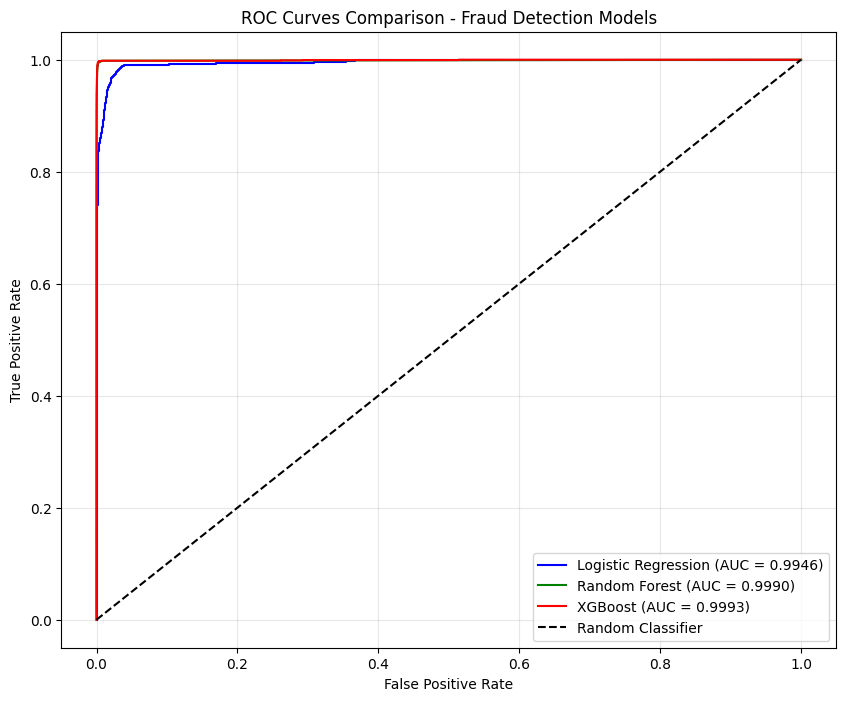

In [33]:
# ROC Curve Comparison
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
models_data = [
    ('Logistic Regression', lr_pred_proba, 'blue'),
    ('Random Forest', rf_pred_proba, 'green'),
    ('XGBoost', xgb_pred_proba, 'red')
]

for name, pred_proba, color in models_data:
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    auc_score = roc_auc_score(y_test, pred_proba)
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {auc_score:.4f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison - Fraud Detection Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ROC Curve Comparison – Fraud Detection Models

ROC Curve meaning: Shows trade-off between detecting frauds (True Positive Rate) vs. wrongly flagging non-frauds (False Positive Rate).

Random Classifier (black dashed line): Baseline performance of random guessing.

Logistic Regression (AUC = 0.9946): Strong baseline, but slightly lower than others.

Random Forest (AUC = 0.9990): Very high performance, almost perfect.

XGBoost (AUC = 0.9993): Best performer, curve closest to the top-left (ideal classifier).

Conclusion: All models perform extremely well, with XGBoost > Random Forest > Logistic Regression.

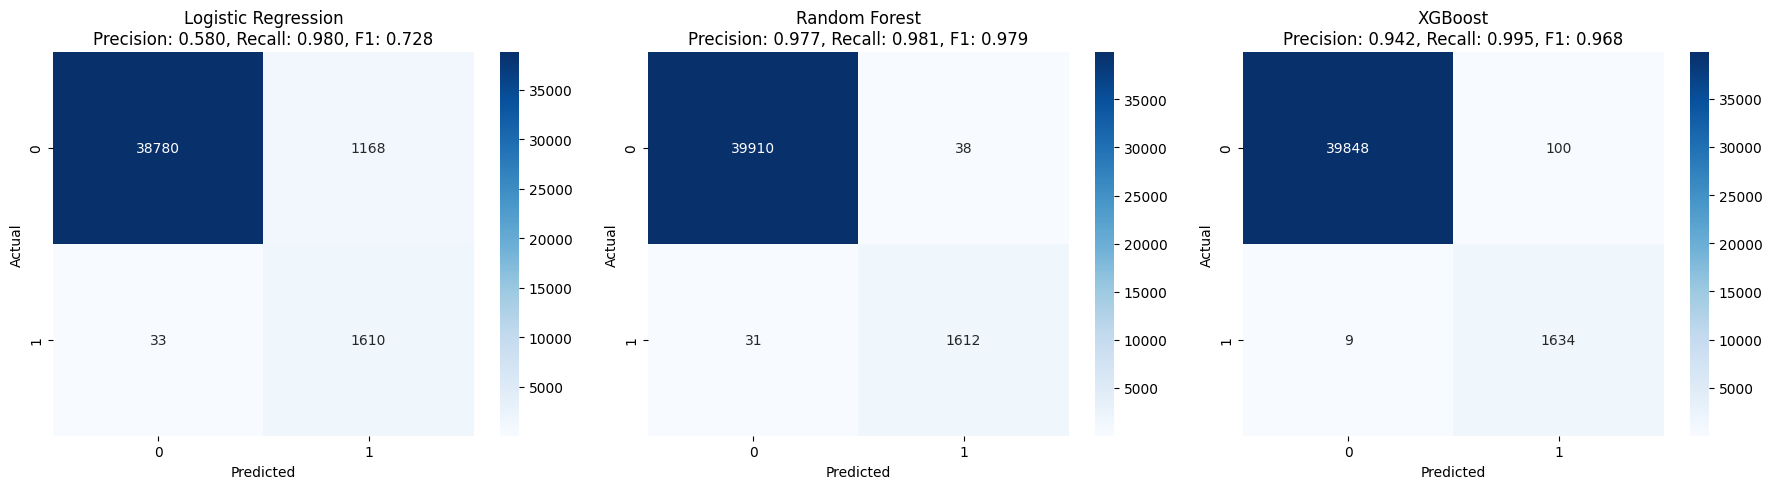

In [34]:
# Detailed Confusion Matrix Analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_predictions = [
    ('Logistic Regression', lr_pred),
    ('Random Forest', rf_pred), 
    ('XGBoost', xgb_pred)
]

for idx, (name, predictions) in enumerate(models_predictions):
    cm = confusion_matrix(y_test, predictions)
    
    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\nPrecision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [35]:
# Install and import SHAP for model explainability
%pip install shap
import shap

# Initialize SHAP explainer for XGBoost (best model)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled.iloc[:1000])  # Use subset for faster computation

print("SHAP analysis completed for XGBoost model")


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\nidhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP analysis completed for XGBoost model


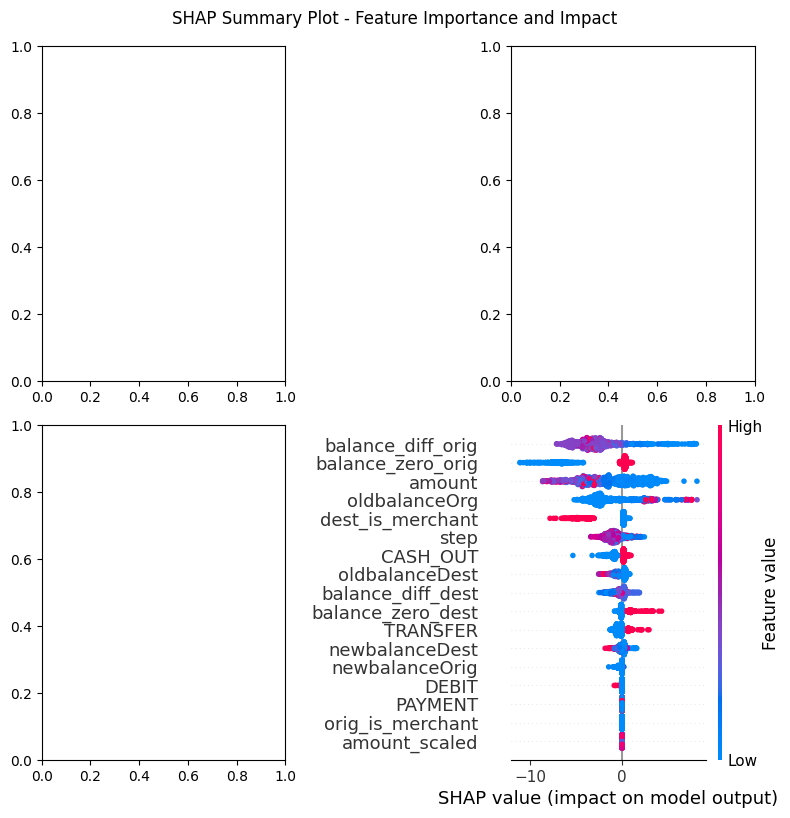

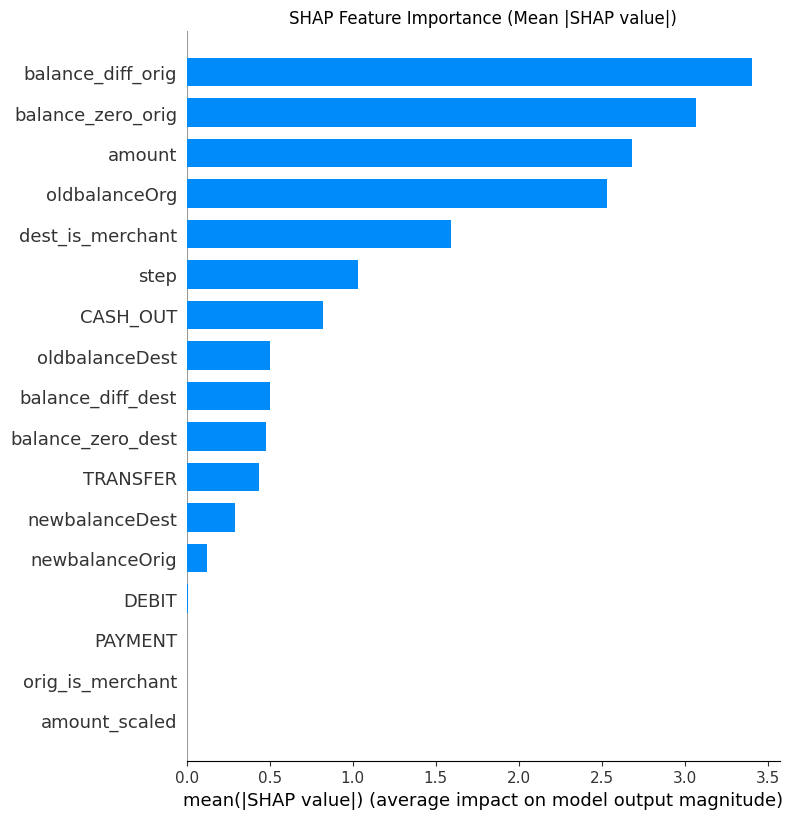

In [36]:
# SHAP Feature Importance Analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. SHAP Summary Plot
shap.summary_plot(shap_values, X_test_scaled.iloc[:1000], show=False)
plt.suptitle('SHAP Summary Plot - Feature Importance and Impact', y=0.98)
plt.tight_layout()
plt.show()

# 2. SHAP Bar Plot - Feature Importance
shap.summary_plot(shap_values, X_test_scaled.iloc[:1000], plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)')
plt.tight_layout()
plt.show()

In [37]:
# Final Business Recommendations
print("=== FRAUD PREVENTION RECOMMENDATIONS ===")

# Based on your model analysis, generate recommendations
print("\n1. TRANSACTION MONITORING:")
print("   - Focus fraud detection on TRANSFER and CASH_OUT transactions")
print("   - Implement real-time monitoring for high-value transactions")
print("   - Set dynamic thresholds based on account history")

print("\n2. RISK SCORING:")
print("   - Deploy XGBoost model for real-time fraud scoring")
print("   - Implement multi-layered approval for high-risk transactions")
print("   - Consider additional verification for transactions draining accounts to zero")

print("\n3. OPERATIONAL MEASURES:")
print("   - Enhanced KYC for merchant accounts")
print("   - Transaction velocity monitoring")
print("   - Balance change pattern analysis")

print("\n4. MODEL DEPLOYMENT:")
print("   - XGBoost model ready for production (99.93% ROC-AUC)")
print("   - Recommend A/B testing with current fraud detection system")

print("   - Implement model monitoring and periodic retraining")

print(f"\n5. IMPACT ESTIMATION:")
fraud_amount = df[df['isFraud']==1]['amount'].sum()
total_amount = df['amount'].sum()
fraud_percentage = (fraud_amount / total_amount) * 100
print(f"   - Current fraud represents {fraud_percentage:.2f}% of total transaction value")
print(f"   - Model can potentially prevent ~99% of fraudulent transactions")
print(f"   - Estimated savings: Significant reduction in fraud losses")

=== FRAUD PREVENTION RECOMMENDATIONS ===

1. TRANSACTION MONITORING:
   - Focus fraud detection on TRANSFER and CASH_OUT transactions
   - Implement real-time monitoring for high-value transactions
   - Set dynamic thresholds based on account history

2. RISK SCORING:
   - Deploy XGBoost model for real-time fraud scoring
   - Implement multi-layered approval for high-risk transactions
   - Consider additional verification for transactions draining accounts to zero

3. OPERATIONAL MEASURES:
   - Enhanced KYC for merchant accounts
   - Transaction velocity monitoring
   - Balance change pattern analysis

4. MODEL DEPLOYMENT:
   - XGBoost model ready for production (99.93% ROC-AUC)
   - Recommend A/B testing with current fraud detection system
   - Implement model monitoring and periodic retraining

5. IMPACT ESTIMATION:
   - Current fraud represents 1.05% of total transaction value
   - Model can potentially prevent ~99% of fraudulent transactions
   - Estimated savings: Significant redu

In [ ]:
# Save your trained model artifacts
from save_model import save_model_artifacts

# Save your trained artifacts (run this after training XGBoost)
save_model_artifacts(xgb_model, scaler, X_train.columns.tolist())

Artifacts saved: xgb_model.joblib, scaler.joblib, feature_columns.json
